In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import linear_model as lm
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.linear_model import LassoCV
import statsmodels.formula.api as formulas
%matplotlib inline

In [2]:
#open the files
train_data = pd.read_csv('Bikeshare_train.csv', sep=",", header=0)
test_data = pd.read_csv('Bikeshare_test.csv', sep=",", header=0)

train_data.rename(index=str, columns={"count": "rentals"}, inplace=True)
test_data.rename(index=str, columns={"count": "rentals"}, inplace=True)
train_data
test_data

,Unnamed: 0,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,rentals
0,0,1.0,2.0,0.0,4.0,1.0,1.0,2.0,6.0,56.2083,0.194037,3830.0
1,1,1.0,12.0,0.0,4.0,1.0,2.0,1.0,3.0,65.2917,0.350133,2114.0
2,2,2.0,6.0,0.0,4.0,1.0,2.0,36.0,37.0,56.8333,0.149883,915.0
3,3,1.0,2.0,0.0,1.0,1.0,1.0,8.0,12.0,49.0833,0.268033,4322.0
4,4,2.0,5.0,0.0,0.0,0.0,1.0,28.0,29.0,69.7083,0.215171,6591.0
5,5,3.0,8.0,0.0,2.0,1.0,1.0,25.0,26.0,54.8333,0.125008,5204.0
6,6,4.0,11.0,0.0,4.0,1.0,1.0,3.0,8.0,55.5652,0.115522,5323.0
7,7,3.0,9.0,1.0,1.0,0.0,2.0,27.0,28.0,79.0417,0.212696,3351.0
8,8,1.0,12.0,0.0,4.0,1.0,2.0,12.0,16.0,75.7500,0.047275,7258.0
9,9,2.0,6.0,0.0,2.0,1.0,2.0,26.0,27.0,83.3333,0.214546,4972.0


In [3]:
print(train_data.dtypes)
pd.set_option('display.max_rows', 500)
test_data

Unnamed: 0       int64
season         float64
month          float64
holiday        float64
day_of_week    float64
workingday     float64
weather        float64
temp           float64
atemp          float64
humidity       float64
windspeed      float64
rentals        float64
dtype: object


,Unnamed: 0,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,rentals
0,0,1.0,2.0,0.0,4.0,1.0,1.0,2.0,6.0,56.2083,0.194037,3830.0
1,1,1.0,12.0,0.0,4.0,1.0,2.0,1.0,3.0,65.2917,0.350133,2114.0
2,2,2.0,6.0,0.0,4.0,1.0,2.0,36.0,37.0,56.8333,0.149883,915.0
3,3,1.0,2.0,0.0,1.0,1.0,1.0,8.0,12.0,49.0833,0.268033,4322.0
4,4,2.0,5.0,0.0,0.0,0.0,1.0,28.0,29.0,69.7083,0.215171,6591.0
5,5,3.0,8.0,0.0,2.0,1.0,1.0,25.0,26.0,54.8333,0.125008,5204.0
6,6,4.0,11.0,0.0,4.0,1.0,1.0,3.0,8.0,55.5652,0.115522,5323.0
7,7,3.0,9.0,1.0,1.0,0.0,2.0,27.0,28.0,79.0417,0.212696,3351.0
8,8,1.0,12.0,0.0,4.0,1.0,2.0,12.0,16.0,75.7500,0.047275,7258.0
9,9,2.0,6.0,0.0,2.0,1.0,2.0,26.0,27.0,83.3333,0.214546,4972.0


Avg rentals on a non-working day:  4461.073394495413
Avg rentals on a working day:  4665.896396396396


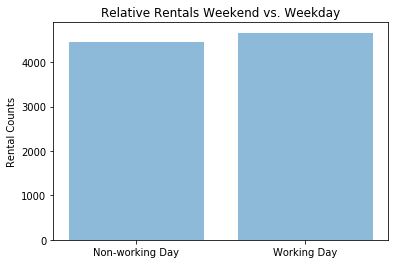

Avg rentals on holiday:  4612.171875
Avg rentals on non-holiday:  4199.181818181818


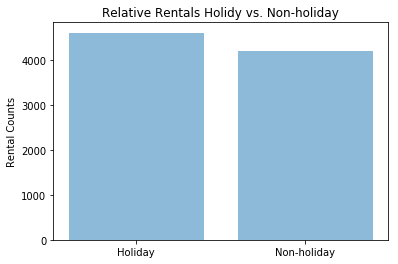

Avg rentals for each season:  [2210.0, 5044.4, 5680.738636363636, 5602.041666666667]


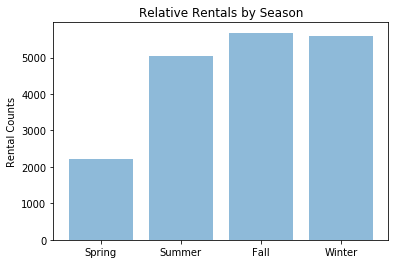

Avg rentals for each type of weather:  [9727.642201834862, 2096.2783018867926, 1736.2, 0]


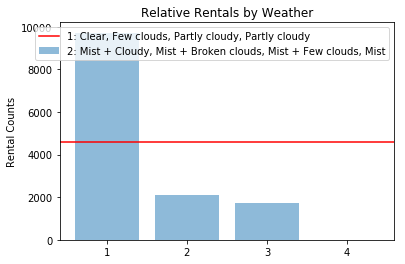

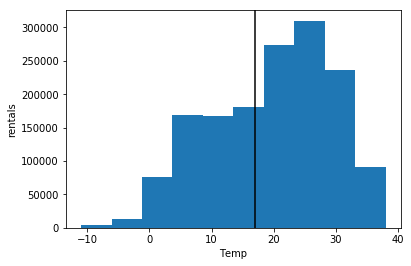

In [4]:
avg = [0, 0]

#Q1. How do the average rentals compare on weekdays vs weekend (training data set)?
#A. The average rentals on a non-working day were 4,461, while average rentals on a working day were
#   4,666. This was unexpected; you'd think that bike rentals would be hiked during the weekend.

objects = ('0', '1')
y_pos = np.arange(len(objects))

day = [train_data.loc[train_data['workingday'] == 0, 'rentals'].sum()]
day.append(train_data.loc[train_data['workingday'] == 1, 'rentals'].sum())
#print("Day = ", day)
number_of_entries = list(pd.value_counts(train_data['workingday'].values, sort=False))
number_of_entries = list(reversed(number_of_entries))
#print("Number of Entries = ", number_of_entries)
avg[0] = day[0] / number_of_entries[0]
avg[1] = day[1] / number_of_entries[1]
print("Avg rentals on a non-working day: ", avg[0])
print("Avg rentals on a working day: ", avg[1])
plt.bar(y_pos, avg, align='center', alpha=0.5)
plt.xticks(y_pos, ['Non-working Day', 'Working Day'])
plt.ylabel('Rental Counts')
plt.title('Relative Rentals Weekend vs. Weekday')
plt.show()

#Q2. How do bike rentals vary on holidays vs. non-holidays?
#A. Avg rentals on holiday were 4,612 on average, but 4,199 on average for a non-holiday, about 10% different.
objects = ('0', '1')
y_pos = np.arange(len(objects))
day = [train_data.loc[train_data['holiday'] == 0, 'rentals'].sum()]
day.append(train_data.loc[train_data['holiday'] == 1, 'rentals'].sum())
number_of_entries = list(pd.value_counts(train_data['holiday'].values, sort=False))
avg[0] = day[0] / number_of_entries[0]
avg[1] = day[1] / number_of_entries[1]
print("Avg rentals on holiday: ", avg[0])
print("Avg rentals on non-holiday: ", avg[1])
plt.bar(y_pos, avg, align='center', alpha=0.5)
plt.xticks(y_pos, ['Holiday', 'Non-holiday'])
plt.ylabel('Rental Counts')
plt.title('Relative Rentals Holidy vs. Non-holiday')
plt.show()

#Q3: How are rentals distributed by season?
#A: Spring has the lowest number, just over 2,000 per day. The other seasons see a multiple of that - on the order of
#5,000 per day (rounded).
avg_2 = [0, 0, 0, 0]
objects = ('1', '2', '3', '4')
y_pos = np.arange(len(objects))
day = [train_data.loc[train_data['season'] == 1, 'rentals'].sum()]
day.append(train_data.loc[train_data['season'] == 2, 'rentals'].sum())
day.append(train_data.loc[train_data['season'] == 3, 'rentals'].sum())
day.append(train_data.loc[train_data['season'] == 4, 'rentals'].sum())
number_of_entries = list(pd.value_counts(train_data['season'].values, sort=False))
#number_of_entries = list(reversed(number_of_entries))
#print("Number of Entries = ", number_of_entries)
avg_2[0] = day[0] / number_of_entries[0]
avg_2[1] = day[1] / number_of_entries[1]
avg_2[2] = day[2] / number_of_entries[2]
avg_2[3] = day[3] / number_of_entries[3]
print("Avg rentals for each season: ", avg_2)
plt.bar(y_pos, avg_2, align='center', alpha=0.5)
plt.xticks(y_pos, ['Spring', 'Summer', 'Fall', 'Winter'])
plt.ylabel('Rental Counts')
plt.title('Relative Rentals by Season')
plt.show()

#Q4: How are rentals impacted by weather conditions?
#A: Unsurprisingly, rentals are highest when the weather is clear or at worst partly cloudy.
avg_2 = [0, 0, 0, 0]
objects = ('1', '2', '3', '4')
y_pos = np.arange(len(objects))
day = [train_data.loc[train_data['weather'] == 1, 'rentals'].sum()]
day.append(train_data.loc[train_data['weather'] == 2, 'rentals'].sum())
day.append(train_data.loc[train_data['weather'] == 3, 'rentals'].sum())
day.append(train_data.loc[train_data['weather'] == 4, 'rentals'].sum())
number_of_entries = list(pd.value_counts(train_data['weather'].values, sort=False))
mean = np.mean(train_data['rentals'])
#Note: the try..excepts below are due to the fact that some weather parameters are missing in the data,
#which was creating a division by zero.
try:
    avg_2[0] = day[0] / number_of_entries[0]
except:
    avg_2[0] = 0
try:
    avg_2[1] = day[1] / number_of_entries[1]
except:
    avg_2[1] = 0
try:
    avg_2[2] = day[2] / number_of_entries[2]
except:
    avg_2[2] = 0
try:
    avg_2[3] = day[3] / number_of_entries[3]
except:
    avg_2[3] = 0
print("Avg rentals for each type of weather: ", avg_2)
plt.bar(y_pos, avg_2, align='center', alpha=0.5)
plt.axhline(y=mean, color='r', linestyle='-')
plt.xticks(y_pos, objects)
plt.ylabel('Rental Counts')
plt.title('Relative Rentals by Weather')
plt.legend( ('1: Clear, Few clouds, Partly cloudy, Partly cloudy',
             '2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
             '3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds', 
             '4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog') )
plt.show()

#Q5: How are rentals impacted by temperature?
#A: We prepared a histogram to demonstrate this impact. The bulk of rentals occurred when the temperature ranged
#from 20-40. We thought the histogram would be improved if each bar had a low-high range in the x-axis, but we could
#not get this feature to work.
mean = np.mean(train_data['temp'])
plt.hist(train_data['temp'], weights=train_data['rentals'])
plt.axvline(x=mean, color = "black")
plt.ylabel('rentals')
plt.xlabel('Temp')
plt.show()

In [5]:
train_data = pd.get_dummies(train_data, prefix = ['season', 'month', 'day_of_week', 'weather'], columns = ['season', 'month', 'day_of_week', 'weather'], drop_first = True)
test_data = pd.get_dummies(test_data, prefix = ['season', 'month', 'day_of_week', 'weather'], columns = ['season', 'month', 'day_of_week', 'weather'], drop_first = True)

In [6]:
#train_data.columns
#Note: You might well wonder the purpose for the code below. When we put together our
#formulas to run our regressions later here, the code was tripping over the ".0" that
#ends these data items. Neither us nor the TFs in Office Hours could figure out why
#this posed a problem, so we (manually, painstakingly) renamed them all.

train_data.rename(index=str, columns={'season_2.0' : 'season_2'}, inplace=True)
train_data.rename(index=str, columns={'season_3.0' : 'season_3'}, inplace=True)
train_data.rename(index=str, columns={'season_4.0' : 'season_4'}, inplace=True)
train_data.rename(index=str, columns={'month_2.0' : 'month_2'}, inplace=True)
train_data.rename(index=str, columns={'month_3.0' : 'month_3'}, inplace=True)
train_data.rename(index=str, columns={'month_4.0' : 'month_4'}, inplace=True)
train_data.rename(index=str, columns={'month_5.0' : 'month_5'}, inplace=True)
train_data.rename(index=str, columns={'month_6.0' : 'month_6'}, inplace=True)
train_data.rename(index=str, columns={'month_7.0' : 'month_7'}, inplace=True)
train_data.rename(index=str, columns={'month_8.0' : 'month_8'}, inplace=True)
train_data.rename(index=str, columns={'month_9.0' : 'month_9'}, inplace=True)
train_data.rename(index=str, columns={'month_10.0' : 'month_10'}, inplace=True)
train_data.rename(index=str, columns={'month_11.0' : 'month_11'}, inplace=True)
train_data.rename(index=str, columns={'month_12.0' : 'month_12'}, inplace=True)
train_data.rename(index=str, columns={'day_of_week_1.0' : 'day_of_week_1'}, inplace=True)
train_data.rename(index=str, columns={'day_of_week_2.0' : 'day_of_week_2'}, inplace=True)
train_data.rename(index=str, columns={'day_of_week_3.0' : 'day_of_week_3'}, inplace=True)
train_data.rename(index=str, columns={'day_of_week_4.0' : 'day_of_week_4'}, inplace=True)
train_data.rename(index=str, columns={'day_of_week_5.0' : 'day_of_week_5'}, inplace=True)
train_data.rename(index=str, columns={'day_of_week_6.0' : 'day_of_week_6'}, inplace=True)
train_data.rename(index=str, columns={'weather_2.0' : 'weather_2'}, inplace=True)
train_data.rename(index=str, columns={'weather_3.0' : 'weather_3'}, inplace=True)
train_data.columns

test_data.rename(index=str, columns={'season_2.0' : 'season_2'}, inplace=True)
test_data.rename(index=str, columns={'season_3.0' : 'season_3'}, inplace=True)
test_data.rename(index=str, columns={'season_4.0' : 'season_4'}, inplace=True)
test_data.rename(index=str, columns={'month_2.0' : 'month_2'}, inplace=True)
test_data.rename(index=str, columns={'month_3.0' : 'month_3'}, inplace=True)
test_data.rename(index=str, columns={'month_4.0' : 'month_4'}, inplace=True)
test_data.rename(index=str, columns={'month_5.0' : 'month_5'}, inplace=True)
test_data.rename(index=str, columns={'month_6.0' : 'month_6'}, inplace=True)
test_data.rename(index=str, columns={'month_7.0' : 'month_7'}, inplace=True)
test_data.rename(index=str, columns={'month_8.0' : 'month_8'}, inplace=True)
test_data.rename(index=str, columns={'month_9.0' : 'month_9'}, inplace=True)
test_data.rename(index=str, columns={'month_10.0' : 'month_10'}, inplace=True)
test_data.rename(index=str, columns={'month_11.0' : 'month_11'}, inplace=True)
test_data.rename(index=str, columns={'month_12.0' : 'month_12'}, inplace=True)
test_data.rename(index=str, columns={'day_of_week_1.0' : 'day_of_week_1'}, inplace=True)
test_data.rename(index=str, columns={'day_of_week_2.0' : 'day_of_week_2'}, inplace=True)
test_data.rename(index=str, columns={'day_of_week_3.0' : 'day_of_week_3'}, inplace=True)
test_data.rename(index=str, columns={'day_of_week_4.0' : 'day_of_week_4'}, inplace=True)
test_data.rename(index=str, columns={'day_of_week_5.0' : 'day_of_week_5'}, inplace=True)
test_data.rename(index=str, columns={'day_of_week_6.0' : 'day_of_week_6'}, inplace=True)
test_data.rename(index=str, columns={'weather_2.0' : 'weather_2'}, inplace=True)
test_data.rename(index=str, columns={'weather_3.0' : 'weather_3'}, inplace=True)

In [7]:
train_data

,Unnamed: 0,holiday,workingday,temp,atemp,humidity,windspeed,rentals,season_2,season_3,...,month_11,month_12,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,weather_2,weather_3
0,0,0.0,1.0,24.0,26.0,76.5833,0.118167,6073.0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0.0,1.0,15.0,19.0,73.3750,0.174129,6606.0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,2,0.0,1.0,26.0,28.0,56.9583,0.253733,7363.0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,3,0.0,0.0,0.0,4.0,58.6250,0.169779,2431.0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,4,0.0,1.0,23.0,23.0,91.7083,0.097021,1996.0,0,1,...,0,0,0,0,1,0,0,0,0,1
5,5,0.0,1.0,24.0,26.0,69.7083,0.342667,4451.0,1,0,...,0,0,0,1,0,0,0,0,1,0
6,6,0.0,1.0,7.0,11.0,33.3478,0.347835,5315.0,0,0,...,1,0,0,0,0,1,0,0,0,0
7,7,0.0,1.0,23.0,26.0,50.7083,0.269283,4891.0,1,0,...,0,0,0,1,0,0,0,0,0,0
8,8,0.0,0.0,23.0,26.0,50.1667,0.247521,8714.0,0,1,...,0,0,0,0,0,0,0,1,0,0
9,9,0.0,1.0,30.0,30.0,61.9583,0.169771,7347.0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [8]:
mean_temp = train_data.temp.dropna().mean()
sd_temp = train_data.temp.dropna().std()
mean_atemp = train_data.atemp.dropna().mean()
sd_atemp = train_data.atemp.dropna().std()
mean_humidity = train_data.humidity.dropna().mean()
sd_humidity = train_data.humidity.dropna().std()
mean_windspeed = train_data.windspeed.dropna().mean()
sd_windspeed = train_data.windspeed.dropna().std()

train_data['temp'] = train_data['temp'].apply(lambda x: (x - mean_temp ) / (sd_temp))
train_data['atemp'] = train_data['atemp'].apply(lambda x: (x - mean_atemp ) / (sd_atemp))
train_data['humidity'] = train_data['humidity'].apply(lambda x: (x - mean_humidity ) / (sd_humidity))
train_data['windspeed'] = train_data['windspeed'].apply(lambda x: (x - mean_windspeed ) / (sd_windspeed))

train_data

,Unnamed: 0,holiday,workingday,temp,atemp,humidity,windspeed,rentals,season_2,season_3,...,month_11,month_12,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,weather_2,weather_3
0,0,0.0,1.0,0.623798,0.650106,0.920664,-0.928758,6073.0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0.0,1.0,-0.180310,-0.054759,0.696852,-0.213502,6606.0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,2,0.0,1.0,0.802489,0.851495,-0.448383,0.803926,7363.0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,3,0.0,0.0,-1.520492,-1.565182,-0.332113,-0.269099,2431.0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,4,0.0,1.0,0.534453,0.348021,1.975789,-1.199027,1996.0,0,1,...,0,0,0,0,1,0,0,0,0,1
5,5,0.0,1.0,0.623798,0.650106,0.441062,1.940601,4451.0,1,0,...,0,0,0,1,0,0,0,0,1,0
6,6,0.0,1.0,-0.895074,-0.860318,-2.095460,2.006654,5315.0,0,0,...,1,0,0,0,0,1,0,0,0,0
7,7,0.0,1.0,0.534453,0.650106,-0.884385,1.002672,4891.0,1,0,...,0,0,0,1,0,0,0,0,0,0
8,8,0.0,0.0,0.534453,0.650106,-0.922167,0.724530,8714.0,0,1,...,0,0,0,0,0,0,0,1,0,0
9,9,0.0,1.0,1.159871,1.052885,-0.099581,-0.269202,7347.0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [9]:
train_data.columns
test_data.columns

Index(['Unnamed: 0', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'rentals', 'season_2', 'season_3', 'season_4', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'day_of_week_1',
       'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5',
       'day_of_week_6', 'weather_2', 'weather_3'],
      dtype='object')

In [10]:
# normalize test data 
test_data['temp'] = test_data['temp'].apply(lambda x: (x - mean_temp ) / (sd_temp))
test_data['atemp'] = test_data['atemp'].apply(lambda x: (x - mean_atemp ) / (sd_atemp))
test_data['humidity'] = test_data['humidity'].apply(lambda x: (x - mean_humidity ) / (sd_humidity))
test_data['windspeed'] = test_data['windspeed'].apply(lambda x: (x - mean_windspeed ) / (sd_windspeed))

In [11]:
y_train = train_data['rentals'].values
X_train = train_data[['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed', 'season_2', 
                 'season_3', 'season_4', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
                 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'day_of_week_1', 
                 'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'weather_2', 
                 'weather_3']].values

y_test = test_data['rentals'].values
X_test = test_data[['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed', 'season_2', 
                 'season_3', 'season_4', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
                 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'day_of_week_1', 
                 'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'weather_2', 
                 'weather_3']].values


In [12]:
y_train = y_train.reshape(len(y_train), 1)
y_test = y_test.reshape(len(y_test), 1)
print(X_train.shape, y_train.shape, X_test.shape , y_test.shape)

(331, 28) (331, 1) (400, 28) (400, 1)


In [13]:
X_train_lm = X_train
y_train_lm = y_train


lm_1 = LinearRegression(fit_intercept=True)
lm_1.fit(X_train, y_train)

y_pred = lm_1.predict(X_test)

print('The equation of the regression plane is: {} + {}^T . x'.format(lm_1.intercept_, lm_1.coef_))

The equation of the regression plane is: [3681.77653152] + [[ -284.35627461   308.15314174   925.73384986   312.43407189
   -548.49294906  -255.12258899   898.82903949  1032.88157484
   1226.18654265    88.94009267   239.18089841   333.34908642
    -65.81249999  -792.2628985  -1279.98700626  -776.4754899
    405.1445661    486.25090367   112.68164522  -118.83581872
   -123.75147639  -195.28593262   170.51134687    61.25602987
    111.06689939   465.14500996   -16.56658402 -1581.97828361]]^T . x


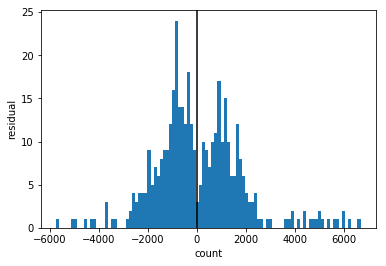

In [14]:
# Residual plot
plt.hist(y_test - y_pred, bins=100)
plt.axvline(x=0, color = "black")
plt.ylabel('residual')
plt.xlabel('count')
plt.show()

In [15]:
# The only factor that seems to have a positive corrleation with rentals (which doesn't have a p value rendering it
# statistically insignificant), is factor 9, which is the season 4 (winter) flag. 

# Day of the week, month, and holiday seem to have no relationship to rentals.

# CAUTION: The values here were computed with a number of factors that need to be removed due to colinearity and we do NOT
# consider the current relationships, as observed, reliable.

# The coefficients for temp and atemp are different nominally, as shown below:
# x3           925.7338    474.536      1.951      0.052      -8.070    1859.538
# x4           312.4341    429.987      0.727      0.468    -533.705    1158.573
# One is 926 and the other is 312, as can be seen, but in a statistical sense they aren't *really* different because
# we cannot say they are reliably different from zero (i.e., the variation observed might be noise.)

In [16]:
train_MSE= np.mean((y_train - lm_1.predict(X_train))**2)
test_MSE= np.mean((y_test - lm_1.predict(X_test))**2)
print('The train MSE is {}, the test MSE is {}'.format(train_MSE, test_MSE))

train_R_sq = lm_1.score(X_train, y_train)
test_R_sq = lm_1.score(X_test, y_test)
print('The train R^2 is {}, the test R^2 is {}'.format(train_R_sq, test_R_sq))

The train MSE is 1582798.9906358493, the test MSE is 3278914.06679317
The train R^2 is 0.5761281783129482, the test R^2 is 0.24934211146527574


In [17]:
# statsmodel regression
# create the X matrix by appending a column of ones to x_train
X = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)
# build the OLS model from the training data
smm = sm.OLS(y_train, X)

#save regression info in results_sm
results_sm = smm.fit()

print(results_sm)


In [18]:
print(results_sm.summary())
print('Parameters: ', results_sm.params)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     15.25
Date:                Sun, 11 Aug 2019   Prob (F-statistic):           6.56e-42
Time:                        22:24:01   Log-Likelihood:                -2832.1
No. Observations:                 331   AIC:                             5720.
Df Residuals:                     303   BIC:                             5827.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3681.7765    433.655      8.490      0.0

   Unnamed: 0  holiday  workingday      temp     atemp  humidity  windspeed  \
0           0      0.0         1.0  0.623798  0.650106  0.920664  -0.928758   
1           1      0.0         1.0 -0.180310 -0.054759  0.696852  -0.213502   
2           2      0.0         1.0  0.802489  0.851495 -0.448383   0.803926   
3           3      0.0         0.0 -1.520492 -1.565182 -0.332113  -0.269099   
4           4      0.0         1.0  0.534453  0.348021  1.975789  -1.199027   

   rentals  season_2  season_3  ...  month_11  month_12  day_of_week_1  \
0   6073.0         1         0  ...         0         0              0   
1   6606.0         0         0  ...         0         1              0   
2   7363.0         1         0  ...         0         0              0   
3   2431.0         0         0  ...         0         1              0   
4   1996.0         0         1  ...         0         0              0   

   day_of_week_2  day_of_week_3  day_of_week_4  day_of_week_5  day_of_week_6  \


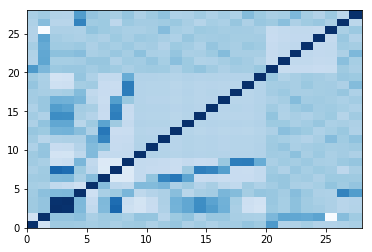

 1.00 -0.26  0.02  0.00 -0.02  0.02 -0.05  0.01  0.05 -0.05 -0.00 -0.06 -0.01  0.00  0.06  0.02  0.36 -0.07 -0.07 -0.02 -0.08 -0.07 -0.06 -0.03 
-0.26  1.00  0.06  0.09 -0.03  0.06  0.05 -0.11  0.03  0.07 -0.06  0.04  0.04 -0.03 -0.04 -0.05  0.15  0.28  0.26  0.24  0.29 -0.57  0.11  0.01 
 0.02  0.06  1.00  0.14 -0.15 -0.28 -0.19 -0.06  0.18  0.26  0.44  0.34  0.20 -0.04 -0.24 -0.28  0.03 -0.02  0.08  0.01 -0.01 -0.05 -0.10 -0.08 
 0.00  0.09  0.14  1.00 -0.24 -0.14 -0.09 -0.05  0.11 -0.11 -0.02 -0.01  0.16  0.12 -0.01  0.05  0.04 -0.00  0.11  0.03 -0.05 -0.06  0.50  0.34 
-0.02 -0.03 -0.15 -0.24  1.00  0.13  0.13  0.17 -0.05  0.02 -0.08 -0.02 -0.12 -0.14  0.01 -0.06 -0.00  0.05 -0.03 -0.05 -0.02  0.07  0.01  0.06 
 0.02  0.06 -0.28 -0.14  0.13  1.00 -0.08 -0.08 -0.09 -0.07 -0.09 -0.08 -0.09 -0.08 -0.09 -0.07  0.00  0.00  0.08 -0.03  0.03 -0.04 -0.01 -0.05 
-0.05  0.05 -0.19 -0.09  0.13 -0.08  1.00 -0.08 -0.10 -0.08 -0.09 -0.09 -0.10 -0.09 -0.09 -0.08  0.02  0.05 -0.04 -0.00  0.01 -0.0

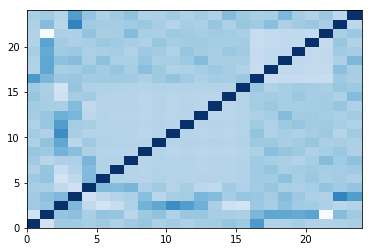

In [19]:
#Part (c): Checking Collinearity
print(train_data.head())
dimensions = ['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed', 'season_2', 
    'season_3', 'season_4', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
    'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'day_of_week_1', 
    'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'weather_2', 
    'weather_3']
corr_matrix = np.corrcoef(train_data[dimensions].T)
for y in range(0, len(corr_matrix)):
    for x in range(0, len(corr_matrix)):
        print ("%5.2f " % corr_matrix[y][x], end="")
    print()
heatmap = plt.pcolor(corr_matrix, cmap=matplotlib.cm.Blues)
plt.show()

dimensions_2 = ['holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'month_2', 'month_3', 'month_4', 'month_5', 
    'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'day_of_week_1', 
    'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'weather_2', 
    'weather_3']
corr_matrix_2 = np.corrcoef(train_data[dimensions_2].T)
for y in range(0, len(corr_matrix_2)):
    for x in range(0, len(corr_matrix_2)):
        print ("%5.2f " % corr_matrix_2[y][x], end="")
    print()
heatmap_2 = plt.pcolor(corr_matrix_2, cmap=matplotlib.cm.Blues)
plt.show()

In [20]:
#Part (d): Subset Selection
dimensions_3 = ['holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'season_2', 'season_3', 'season_4', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'weather_2', 'weather_3']
y = train_data.rentals
X = train_data[dimensions_3]

In [21]:
# step forward model selection
# gets the bic of a given model, creates dict entry of model with its bic
def get_bic(predictors):
    model = sm.OLS(y, X[list(predictors)]).fit()
    return {"model": model, "bic" : model.bic}

# determine the best of a given set of models
def best_of(predictors):
    remaining_predictors = [p for p in X.columns if p not in predictors]
    results = []
    for p in remaining_predictors:
        results.append(get_bic(predictors+[p]))
    models = pd.DataFrame(results)
    best_model = models.loc[models['bic'].argmin()]
    return best_model

models = pd.DataFrame(columns=["bic", "model"])
predictors = []

# go through predictors stepwise until adding more predictors raises bic
for i in range(1, len(X.columns)+1):
    models.loc[i] = best_of(predictors) 
    predictors = models.loc[i]["model"].model.exog_names
    if i == 1:
        best_score = models.loc[i]["bic"]        
    else:
        if models.loc[i]["bic"] < best_score:
            best_score = models.loc[i]["bic"]        
        if models.loc[i]["bic"] > best_score:
            best_model = models.loc[i-1]
            print(best_model)
            break


bic                                                5885.28
model    <statsmodels.regression.linear_model.Regressio...
Name: 9, dtype: object


C:\Users\Saiteja\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:14: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  


In [22]:
print(best_model[1].summary())

# save model for further use in cross-validation
forward_step_model = best_model[1]

                            OLS Regression Results                            
Dep. Variable:                rentals   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     301.9
Date:                Sun, 11 Aug 2019   Prob (F-statistic):          3.49e-151
Time:                        22:24:02   Log-Likelihood:                -2916.5
No. Observations:                 331   AIC:                             5851.
Df Residuals:                     322   BIC:                             5885.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
workingday     1943.4287    196.541      9.888

In [23]:
dimensions_4 = ['holiday', 'workingday', 'temp', 'humidity', 'season_2', 'season_3', 'day_of_week_6', 'weather_3', 'season_4']

In [24]:
X_train = train_data[['holiday', 'workingday', 'temp', 'humidity', 'season_2', 'season_3', 'day_of_week_6', 'weather_3', 'season_4']].values

X_test = test_data[['holiday', 'workingday', 'temp', 'humidity', 'season_2', 'season_3', 'day_of_week_6', 'weather_3', 'season_4']].values


lm = LinearRegression(fit_intercept=True)
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)


In [25]:
train_MSE= np.mean((y_train - lm.predict(X_train))**2)
test_MSE= np.mean((y_test - lm.predict(X_test))**2)
print('The train MSE is {}, the test MSE is {}'.format(train_MSE, test_MSE))

train_R_sq = lm.score(X_train, y_train)
test_R_sq = lm.score(X_test, y_test)
print('The train R^2 is {}, the test R^2 is {}'.format(train_R_sq, test_R_sq))

The train MSE is 1821071.327748787, the test MSE is 3175895.521393405
The train R^2 is 0.5123191095763557, the test R^2 is 0.2729266526256783


In [26]:
#Part (e): Cross Validation

# our models - lm_1 all predictors
#              lm   pruned predictors

# first model
scores = cross_val_score(lm, X_train_lm, y_train_lm, cv=10)
lm_avg = np.mean(scores)
print('Cross-validated scores', scores, 'Average of folds', lm_avg)
print


Cross-validated scores [ 0.67059684  0.41429407  0.21457739  0.17210258  0.35830049 -0.20947728
  0.33758225  0.28358535  0.6435941   0.52074025] Average of folds 0.34058960299425484


<function print>

In [27]:
# second model
scores = cross_val_score(lm_1, X_train, y_train, cv=10)
lm_1_avg = np.mean(scores)
print('Cross-validated scores', scores, 'Average of folds', lm_1_avg)

Cross-validated scores [ 0.62054756  0.3182517   0.41521836 -0.07085735  0.44344711  0.53178573
  0.35469625  0.29690661  0.62309154  0.59883282] Average of folds 0.41319203406916244
